# Population & General Demographics in East Africa
***
<img src="https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3570&q=80" alt="crowded street" style="width:500px;">

<a id="WebScraping"><h2>Web Scraping</h2></a>
***
<a id="ScraperImport"><h3>Importing Libraries</h3></a>

In [4]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import warnings
warnings.filterwarnings('ignore')

<a id="Setup"><h3>Browser Setup</h3></a>

In [16]:
path="https://data.humdata.org/"
folder=r"C:\Users\NAJIB\Documents\Data Analysis\EastAfrica\Data"
options=Options();
prefs={"download.default_directory":r"C:\Users\NAJIB\Documents\EastAfrica\Data"}
options.add_experimental_option("prefs",prefs);
driver = webdriver.Chrome(options=options)
driver.get(path)

<a id="downloading"><h3>Downloading Country Specific Data</h3></a>

In [3]:
countries=['Somalia','Kenya','Ethiopia','Sudan', 'South Sudan','Eritrea','Djibouti','Rwanda','Uganda',
           'Burundi','Tanzania']

In [18]:
for country in countries:
    searchInput=driver.find_element(By.ID, "q2").send_keys(f'{country} - Health')
    driver.find_element(By.CLASS_NAME,'button').send_keys(Keys.ENTER)
    country_indicator_link=driver.find_element(By.XPATH,'/html/body/div[7]/div/div[3]/div/div/div/div/div/div/section/div[1]/div[2]/div/div/ul/li[1]/div/div/div/div[1]/div[1]/a').click()
    country_indicator_download=driver.find_element(By.XPATH,'/html/body/div[7]/div/div[3]/div/div[2]/div/div/div[2]/div[3]/div[1]/div/ul/li[1]/div[3]/a[1]').click()
    home_btn=driver.find_element(By.XPATH,'/html/body/div[6]/div/nav/div[2]/div/div[1]/div[1]/a').click()

<a id="ColumnExtraction"><h3>Extracting Specific Columns</h3></a>

In [1]:
abbr=['som','bdi','dji','eri','eth','ken','rwa','sdn','ssd','tza','uga']

In [2]:
indicators=['Sex ratio at birth (male births per female births)',
'Age dependency ratio (% of working-age population)',
'Age dependency ratio, old (% of working-age population)',
'Age dependency ratio, young (% of working-age population)',
'Population growth (annual %)',
'Population, total',
'Population, female',
'Population, female (% of total population)'
'Population, male',
'Population, male (% of total population)'
]

In [15]:
final_df=pd.DataFrame()
for abb in abbr:
    df = pd.read_csv(f"./Data\health_{abb}.csv")
    df=df.loc[df['Indicator Name'].isin(indicators)]
    print(df)
    final_df=pd.concat([final_df,df])
    # final_df=final_df.append(df)


     Country Name Country ISO3  Year  \
5748      Somalia          SOM  2021   
5749      Somalia          SOM  2020   
5750      Somalia          SOM  2019   
5751      Somalia          SOM  2018   
5752      Somalia          SOM  2017   
...           ...          ...   ...   
6362      Somalia          SOM  1964   
6363      Somalia          SOM  1963   
6364      Somalia          SOM  1962   
6365      Somalia          SOM  1961   
6366      Somalia          SOM  1960   

                                         Indicator Name     Indicator Code  \
5748  Sex ratio at birth (male births per female bir...     SP.POP.BRTH.MF   
5749  Sex ratio at birth (male births per female bir...     SP.POP.BRTH.MF   
5750  Sex ratio at birth (male births per female bir...     SP.POP.BRTH.MF   
5751  Sex ratio at birth (male births per female bir...     SP.POP.BRTH.MF   
5752  Sex ratio at birth (male births per female bir...     SP.POP.BRTH.MF   
...                                                

In [16]:
final_df.to_csv('east_africa_pops_data.csv', index=False, header=True)
final_df.head(5)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
5748,Somalia,SOM,2021,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.044
5749,Somalia,SOM,2020,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.045
5750,Somalia,SOM,2019,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.044
5751,Somalia,SOM,2018,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.045
5752,Somalia,SOM,2017,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.044


<a id="EDA"><h2>Exploratory Data Analysis</h2></a>
***
<a id="structure"><h3>Checking Data Structure</h3></a>

In [18]:
df=pd.read_csv('east_africa_pops_data.csv')
df.rename(columns={'Country Name':'Country'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5445 non-null   object 
 1   Country ISO3    5445 non-null   object 
 2   Year            5445 non-null   int64  
 3   Indicator Name  5445 non-null   object 
 4   Indicator Code  5445 non-null   object 
 5   Value           5445 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 255.4+ KB


In [23]:
print(df.shape)
df.tail(3)

(5445, 6)


,Country,Country ISO3,Year,Indicator Name,Indicator Code,Value
5442,Uganda,UGA,1962,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.365419
5443,Uganda,UGA,1961,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.438748
5444,Uganda,UGA,1960,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.516925


In [22]:
# visualization
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

Text(0.5, 1.0, 'Distribution of Missing Values')

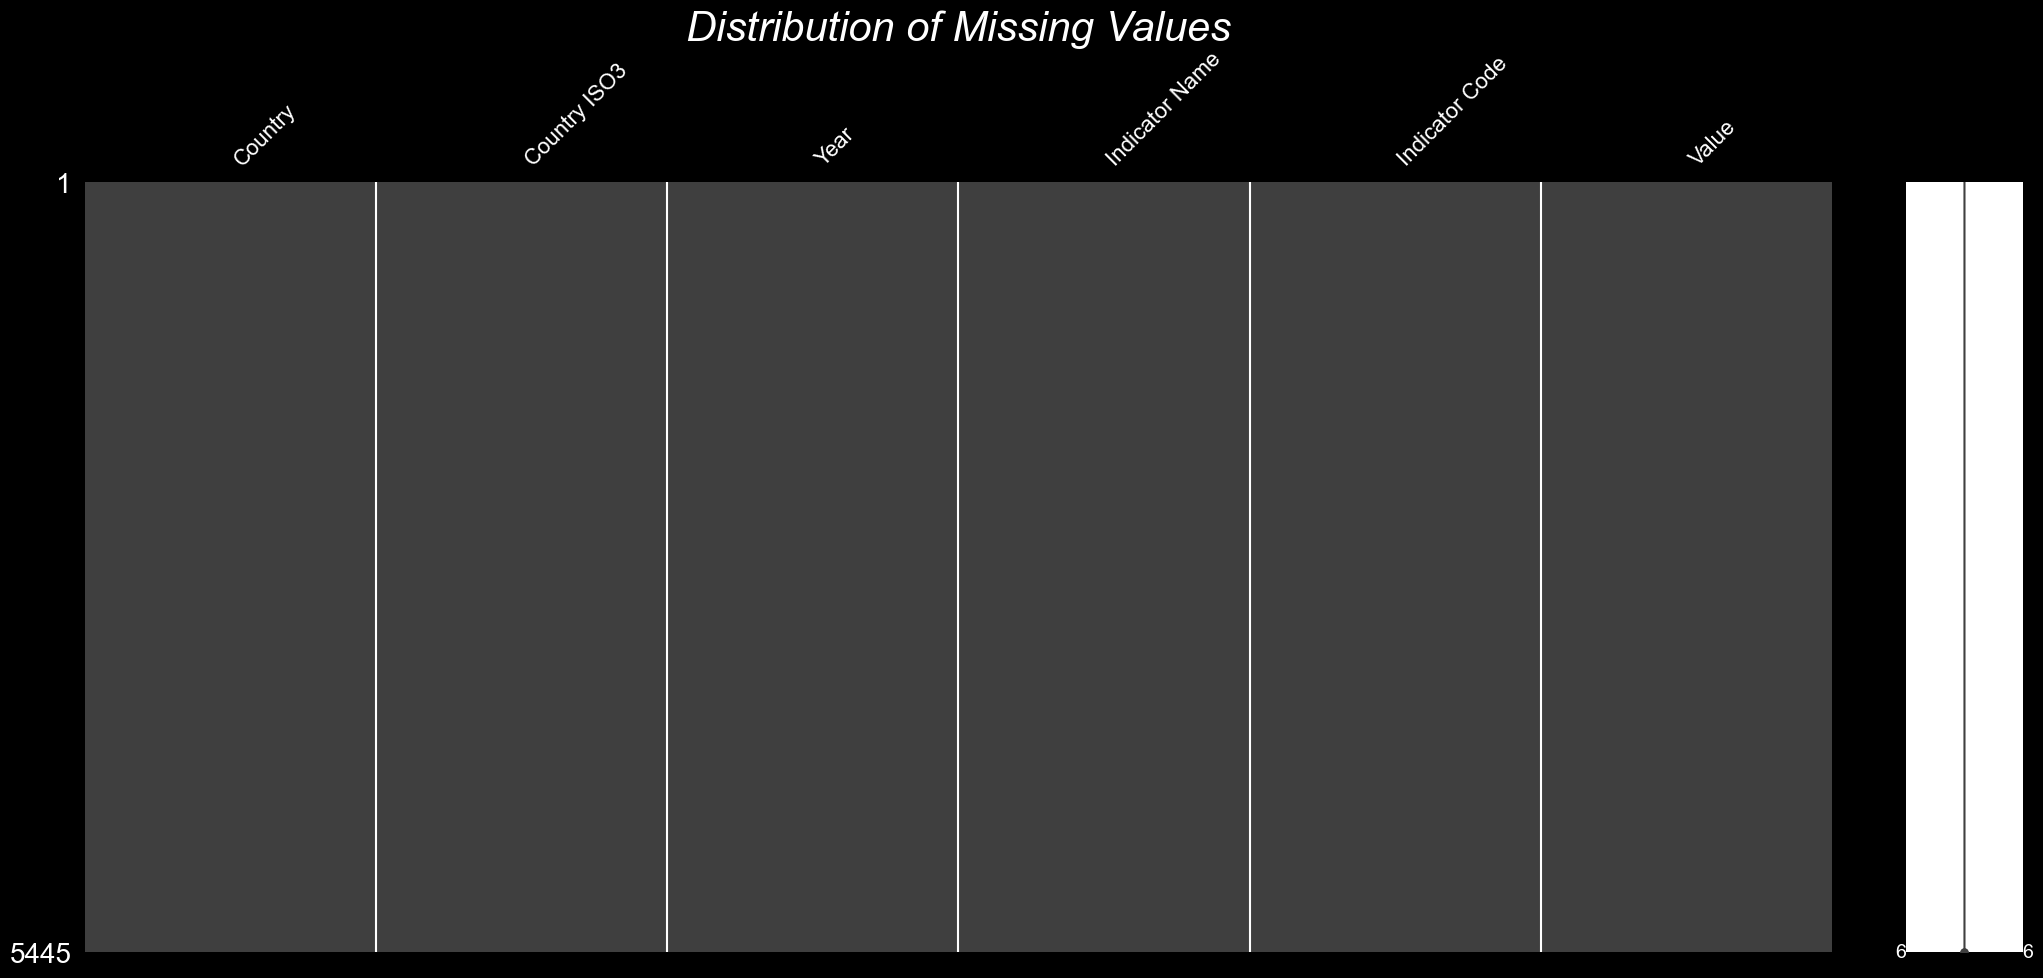

In [24]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

<a id="indicatorspecific"><h3>Creating Indicator specific data frame</h3></a>

In [25]:
def create_separate_frames(indicator):
    temp_df=df.loc[df['Indicator Name']==indicator]
    temp_df=temp_df.filter([f'Country','Year','{indicator}','Value'],axis=1)
#     print(temp_df)
    return temp_df

In [26]:
sex_ratio_df=create_separate_frames('Sex ratio at birth (male births per female births').rename(columns={'Value':'Sex_ratio'})
age_ratio_df=create_separate_frames('Age dependency ratio (% of working-age population)').rename(columns={'Value':'Age_ratio'})
age_ratio_old_df=create_separate_frames('Age dependency ratio, old (% of working-age population)').rename(columns={'Value':'Age_ratio'})
age_ratio_young_df=create_separate_frames('Age dependency ratio, old (% of working-age population)').rename(columns={'Value':'Age_ratio'})
pop_growth_df=create_separate_frames('Population growth (annual %)').rename(columns={'Value':'Pop_growth'})
pop_total_df=create_separate_frames('Population, total').rename(columns={'Value':'Pop_total'})
pop_total_fem_df=create_separate_frames('Population, female').rename(columns={'Value':'Pop_fem'})
pop_fem_df=create_separate_frames('Population, female (% of total population)').rename(columns={'Value':'Pop_fem'})
pop_total_ma_df=create_separate_frames('Population, male').rename(columns={'Value':'Pop_ma'})
pop_ma_df=create_separate_frames('Population, male (% of total population)').rename(columns={'Value':'Pop_ma'})